# Projeto 2 - Análise de dados

**Nome:** *Maria Eduarda Gonçalves Torres*

**Nome:** *Pedro Rubens*

$\Rightarrow$ Carregando algumas bibliotecas :

In [50]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re 
import seaborn as sns

$\Rightarrow$ Importando database :

In [57]:
dados = pd.read_csv('Public_Health.csv')
dados.head(5)

,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),Breast cancer in females,...,Childhood Lead Poisoning,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
0,1,Rogers Park,16.4,62.0,11.0,73.0,11.2,40.8,7.7,23.3,...,0.5,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5
1,2,West Ridge,17.3,83.3,8.1,71.1,8.3,29.9,5.8,20.2,...,1.0,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9
2,3,Uptown,13.1,50.5,8.3,77.7,10.3,35.1,5.4,21.3,...,0.5,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7
3,4,Lincoln Square,17.1,61.0,8.1,80.5,9.7,38.4,5.0,21.7,...,0.4,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8
4,5,North Center,22.4,76.2,9.1,80.4,9.8,8.4,1.0,16.6,...,0.9,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5


In [62]:
dados.describe()

,Community Area,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),Breast cancer in females,Cancer (All Sites),...,Childhood Blood Lead Level Screening,Childhood Lead Poisoning,Gonorrhea in Females,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,76.000000,76.000000,65.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,15.698701,68.394805,10.101299,76.954545,11.264935,50.064935,18.068831,25.951948,194.277922,...,385.294737,0.863158,894.287692,6.844156,20.292208,4.912987,35.829870,21.596104,25106.740260,13.303896
std,22.371857,3.528735,15.257465,3.913926,5.245714,3.016916,28.097817,16.561077,9.557590,45.652058,...,119.869133,0.772846,894.921927,4.587956,11.496988,3.657341,7.269802,12.354995,14952.672297,7.031965
min,1.000000,9.400000,27.700000,3.500000,63.600000,5.000000,1.300000,0.000000,7.600000,120.100000,...,133.600000,0.000000,50.300000,0.000000,3.100000,0.200000,15.500000,2.900000,8535.000000,4.200000
25%,20.000000,12.900000,60.100000,7.300000,73.300000,8.800000,33.700000,4.900000,20.200000,152.900000,...,310.550000,0.300000,141.400000,3.000000,12.000000,2.000000,32.300000,13.400000,15467.000000,7.800000
50%,39.000000,15.700000,68.300000,8.700000,76.100000,10.800000,49.200000,10.800000,24.000000,189.400000,...,389.350000,0.700000,529.000000,6.500000,18.200000,4.200000,38.300000,18.500000,20489.000000,11.500000
75%,58.000000,18.500000,80.700000,12.700000,80.400000,13.700000,67.900000,32.200000,32.700000,235.200000,...,484.125000,1.125000,1512.000000,9.400000,26.100000,6.800000,40.900000,29.400000,29026.000000,17.400000
max,77.000000,22.400000,94.900000,19.700000,94.500000,17.500000,116.900000,70.300000,54.700000,291.500000,...,605.900000,3.700000,3193.300000,22.700000,61.400000,17.600000,50.200000,58.700000,87163.000000,40.000000


In [63]:
dados.dtypes

Community Area                                  int64
Community Area Name                            object
Birth Rate                                    float64
General Fertility Rate                        float64
Low Birth Weight                              float64
Prenatal Care Beginning in First Trimester    float64
Preterm Births                                float64
Teen Birth Rate                               float64
Assault (Homicide)                            float64
Breast cancer in females                      float64
Cancer (All Sites)                            float64
Colorectal Cancer                             float64
Diabetes-related                              float64
Firearm-related                               float64
Infant Mortality Rate                         float64
Lung Cancer                                   float64
Prostate Cancer in Males                      float64
Stroke (Cerebrovascular Disease)              float64
Childhood Blood Lead Level S

In [64]:
correlacao=dados.corr()
correlacao.head(5)

,Community Area,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),Breast cancer in females,Cancer (All Sites),...,Childhood Blood Lead Level Screening,Childhood Lead Poisoning,Gonorrhea in Females,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
Community Area,1.000000,0.030501,0.222777,0.155770,-0.005931,0.226277,0.250163,0.345811,0.300842,0.361057,...,0.272783,0.268276,0.291580,-0.146397,0.110257,0.034607,0.432100,0.161267,-0.366645,0.332464
Birth Rate,0.030501,1.000000,0.810334,0.108179,-0.178847,0.004334,0.612710,0.188536,-0.022201,-0.001289,...,0.481725,0.210016,0.126671,0.279755,0.249764,0.603219,0.115771,0.594249,-0.377653,0.149439
General Fertility Rate,0.222777,0.810334,1.000000,0.142189,-0.134292,0.122235,0.655528,0.293843,0.058089,0.164279,...,0.490693,0.303624,0.250984,0.144972,0.173846,0.655826,0.524558,0.714008,-0.661131,0.275589
Low Birth Weight,0.155770,0.108179,0.142189,1.000000,-0.532546,0.843100,0.622936,0.747493,0.425041,0.759791,...,0.416265,0.388319,0.737727,0.125231,0.681049,-0.080532,0.479581,0.056962,-0.394564,0.702227
Prenatal Care Beginning in First Trimester,-0.005931,-0.178847,-0.134292,-0.532546,1.000000,-0.413383,-0.579170,-0.591605,-0.142970,-0.385923,...,-0.328470,-0.516579,-0.653985,-0.270147,-0.516145,-0.074951,-0.192405,-0.078027,0.200858,-0.542603


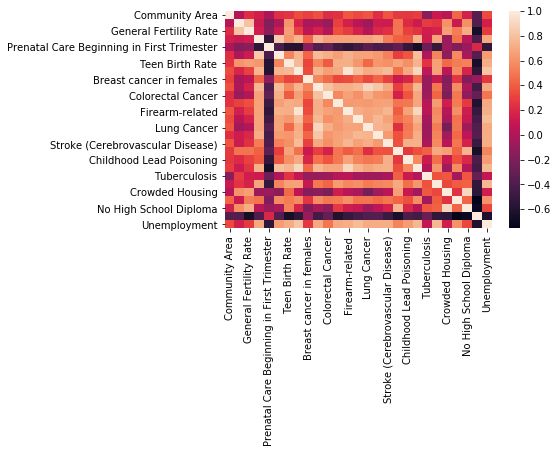

In [65]:
sns.heatmap(correlacao)

* *Com base neste mapa ...*

$\Rightarrow$ Apagando as colunas mais irrelevantes para nossa pesquisa :

In [56]:
# temos que filtrar quais serão as melhores colunas para ajudar em nossa pesquisa
# data = dados.drop(["Preterm Births", "Low Birth Weight"], axis=1) 